Test R notebook

Validate assumptions for mixed-effects model with [this](https://ademos.people.uic.edu/Chapter18.html).


- try things with python first and then verify with R?

In [10]:
library(lme4)
library(AER)
library(dplyr)
library(purrr)
library(magrittr)
library(ggplot2)

data <- read.csv("../../data/processed/60b37265a9f60881975de69e-reshare_rates.csv")
head(data)

,user_id,consent,timeSubmitted,educationLevel,politicalAffiliation,attendsProtests,age,gender_man,gender_nonBinary,gender_woman,⋯,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.215182e+18,1,2021-06-03 16:58:44.576000+00:00,highSchool,none,False,21,1,0,0,⋯,0,0,1,Treatment,High,0.4,0.7,0.25,1.00,0.3636364
2,-1.215182e+18,1,2021-06-03 16:58:44.576000+00:00,highSchool,none,False,21,1,0,0,⋯,0,0,1,Treatment,Low,0.1,0.6,0.50,0.50,0.1428571
3,-1.318327e+18,1,2021-06-03 16:56:16.209000+00:00,highSchool,centreLeft,True,20,1,0,0,⋯,1,0,0,Control,High,0.2,0.0,0.25,0.75,1.0000000
4,-1.318327e+18,1,2021-06-03 16:56:16.209000+00:00,highSchool,centreLeft,True,20,1,0,0,⋯,1,0,0,Control,Low,0.1,0.1,0.00,0.00,0.5000000
5,-1.462428e+18,1,2021-06-03 16:54:39.051000+00:00,undergrad,centreLeft,False,62,1,0,0,⋯,0,0,1,Control,High,0.1,0.1,0.00,0.00,0.5000000
6,-1.462428e+18,1,2021-06-03 16:54:39.051000+00:00,undergrad,centreLeft,False,62,1,0,0,⋯,0,0,1,Control,Low,0.0,0.1,0.25,0.00,0.0000000


## H1 and H3

In [2]:
md.affirms <- lmer(Affirms ~ condition * evidence + (1 | user_id), data = data)
summary(md.affirms)

Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -161.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8411 -0.4295 -0.2428  0.3540  2.5544 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.01374  0.1172  
 Residual             0.01191  0.1091  
Number of obs: 182, groups:  user_id, 91

Fixed effects:
                                Estimate Std. Error t value
(Intercept)                     0.131481   0.021791   6.034
conditionTreatment              0.006356   0.034175   0.186
evidenceLow                    -0.020370   0.021000  -0.970
conditionTreatment:evidenceLow -0.025576   0.032934  -0.777

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.638              
evidenceLow -0.482  0.307       
cndtnTrtm:L  0.307 -0.482 -0.638

**Satterthwaite approximation for p-values**

In [3]:
coefs <- data.frame(coef(summary(md.affirms)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.affirms))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.affirms))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.131481481,0.02179141,6.0336369,"0.131481481, 0.02179141, 6.0336369",0.02179141
conditionTreatment,0.006356356,0.03417474,0.1859957,"0.006356356, 0.03417474, 0.1859957",0.03417474
evidenceLow,-0.020370370,0.02100019,-0.9700088,"-0.020370370, 0.02100019, -0.9700088",0.02100019
conditionTreatment:evidenceLow,-0.025575576,0.03293389,-0.7765731,"-0.025575576, 0.03293389, -0.7765731",0.03293389


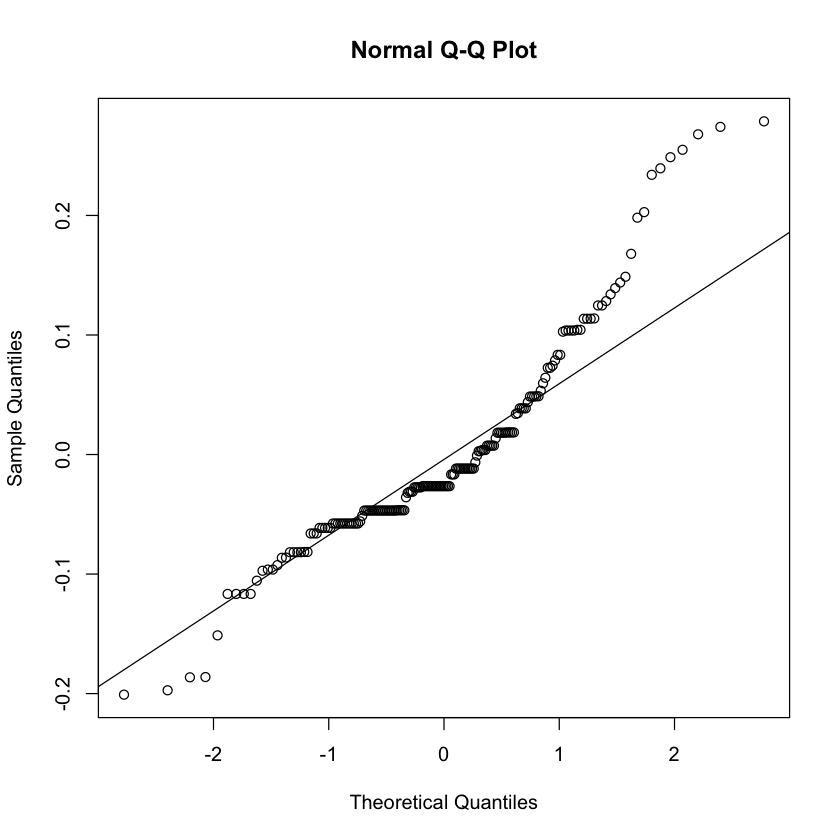

In [4]:
qqnorm(resid(md.affirms))
qqline(resid(md.affirms))  # points fall nicely onto the line - good!

lattice theme set by effectsTheme()
See ?effectsTheme for details.



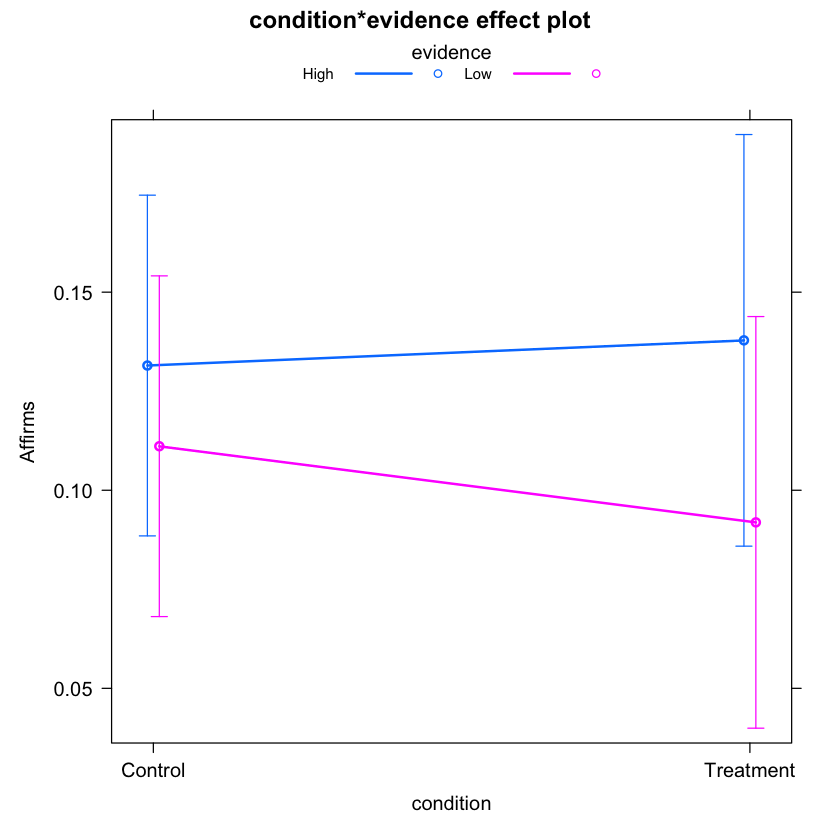

In [5]:
library(effects)
plot(allEffects(md.affirms), multiline=TRUE, ci.style="bars")

## H2 and H4

In [6]:
md.denies <- lmer(Denies ~ condition * evidence + (1 | user_id), data = data)
summary(md.denies)

Linear mixed model fit by REML ['lmerMod']
Formula: Denies ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: -85.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7848 -0.5032 -0.2405  0.4257  3.6258 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.003242 0.05694 
 Residual             0.030247 0.17392 
Number of obs: 182, groups:  user_id, 91

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.06667    0.02490   2.677
conditionTreatment              0.02252    0.03906   0.577
evidenceLow                     0.14815    0.03347   4.426
conditionTreatment:evidenceLow  0.09239    0.05249   1.760

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.638              
evidenceLow -0.672  0.429       
cndtnTrtm:L  0.429 -0.672 -0.638

**Satterthwaite approximation for p-values**

In [7]:
coefs <- data.frame(coef(summary(md.denies)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.denies))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.denies))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.06666667,0.02490331,2.6770202,"0.06666667, 0.02490331, 2.6770202",0.02490331
conditionTreatment,0.02252252,0.03905503,0.5766869,"0.02252252, 0.03905503, 0.5766869",0.03905503
evidenceLow,0.14814815,0.03347039,4.4262447,"0.14814815, 0.03347039, 4.4262447",0.03347039
conditionTreatment:evidenceLow,0.09239239,0.05249049,1.7601739,"0.09239239, 0.05249049, 1.7601739",0.05249049


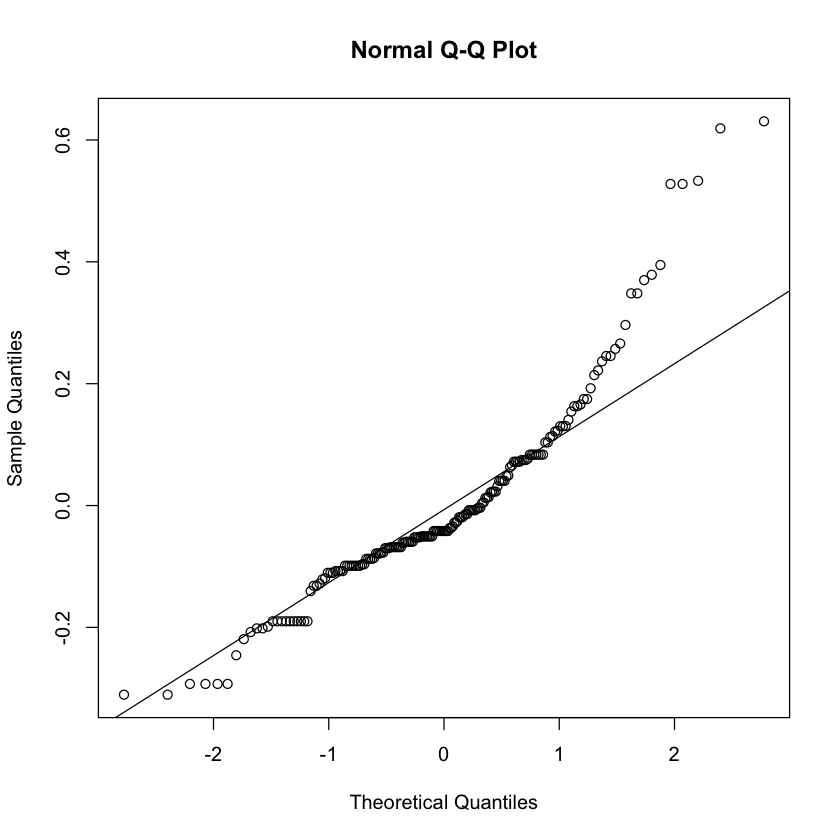

In [8]:
qqnorm(resid(md.denies))
qqline(resid(md.denies))  # points fall nicely onto the line - good!

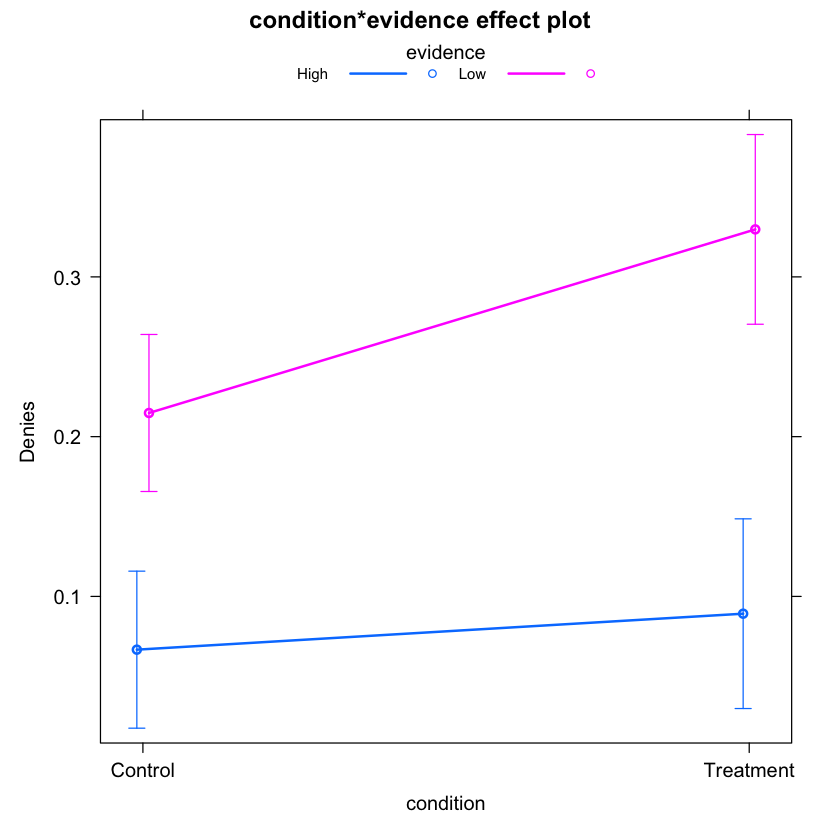

In [9]:
library(effects)
plot(allEffects(md.denies), multiline=TRUE, ci.style="bars")

### OTHER

Regress on rumour prop (affirmations / affirmations + denials)

In [11]:
md.rumour_prop <- lmer(rumour_proportion ~ condition * evidence + (1 | user_id), data = data)
summary(md.rumour_prop)

Linear mixed model fit by REML ['lmerMod']
Formula: rumour_proportion ~ condition * evidence + (1 | user_id)
   Data: data

REML criterion at convergence: 108.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.87043 -0.66633 -0.02126  0.81200  2.13303 

Random effects:
 Groups   Name        Variance Std.Dev.
 user_id  (Intercept) 0.02782  0.1668  
 Residual             0.09084  0.3014  
Number of obs: 142, groups:  user_id, 80

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.64999    0.05785  11.237
conditionTreatment             -0.03357    0.08530  -0.394
evidenceLow                    -0.34590    0.06913  -5.004
conditionTreatment:evidenceLow -0.11031    0.10383  -1.062

Correlation of Fixed Effects:
            (Intr) cndtnT evdncL
cndtnTrtmnt -0.678              
evidenceLow -0.687  0.466       
cndtnTrtm:L  0.457 -0.662 -0.666

**Satterthwaite approximation for p-values**

In [12]:
coefs <- data.frame(coef(summary(md.rumour_prop)))
# get Satterthwaite-approximated degrees of freedom
coefs$df.Satt <- coef(summary(md.rumour_prop))
# get approximate p-values
coefs$p.Satt <- coef(summary(md.rumour_prop))[, 2]
coefs

,Estimate,Std..Error,t.value,df.Satt,p.Satt
,<dbl>,<dbl>,<dbl>,"<dbl[,3]>",<dbl>
(Intercept),0.64999078,0.05784563,11.2366438,"0.64999078, 0.05784563, 11.2366438",0.05784563
conditionTreatment,-0.03356848,0.08530061,-0.3935315,"-0.03356848, 0.08530061, -0.3935315",0.08530061
evidenceLow,-0.34590455,0.06912514,-5.0040341,"-0.34590455, 0.06912514, -5.0040341",0.06912514
conditionTreatment:evidenceLow,-0.11031009,0.10383160,-1.0623942,"-0.11031009, 0.10383160, -1.0623942",0.10383160


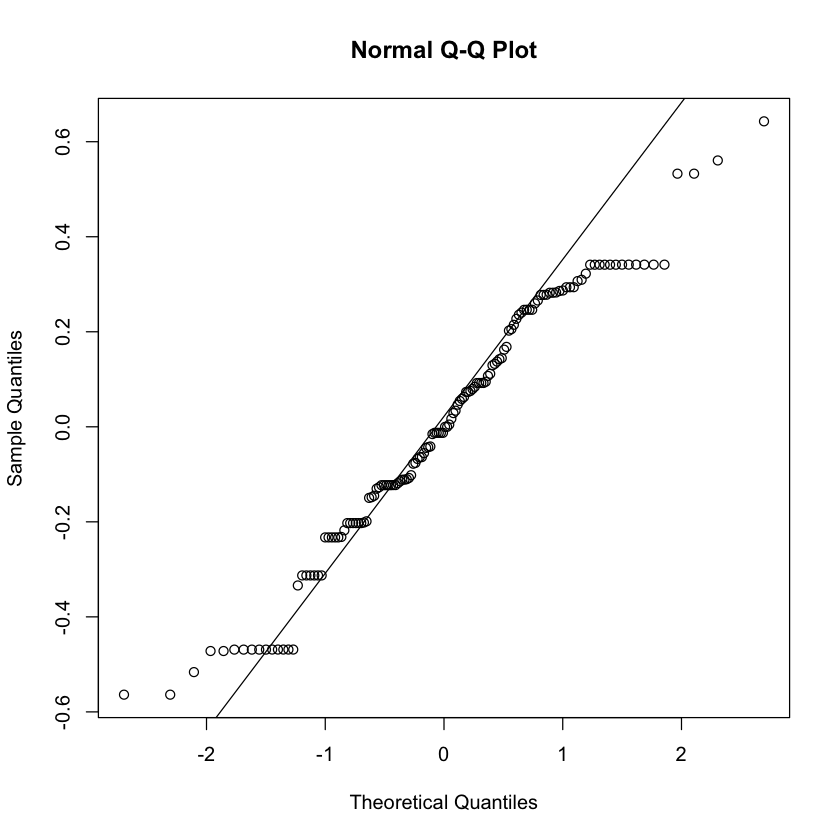

In [13]:
qqnorm(resid(md.rumour_prop))
qqline(resid(md.rumour_prop))  # points fall nicely onto the line - good!

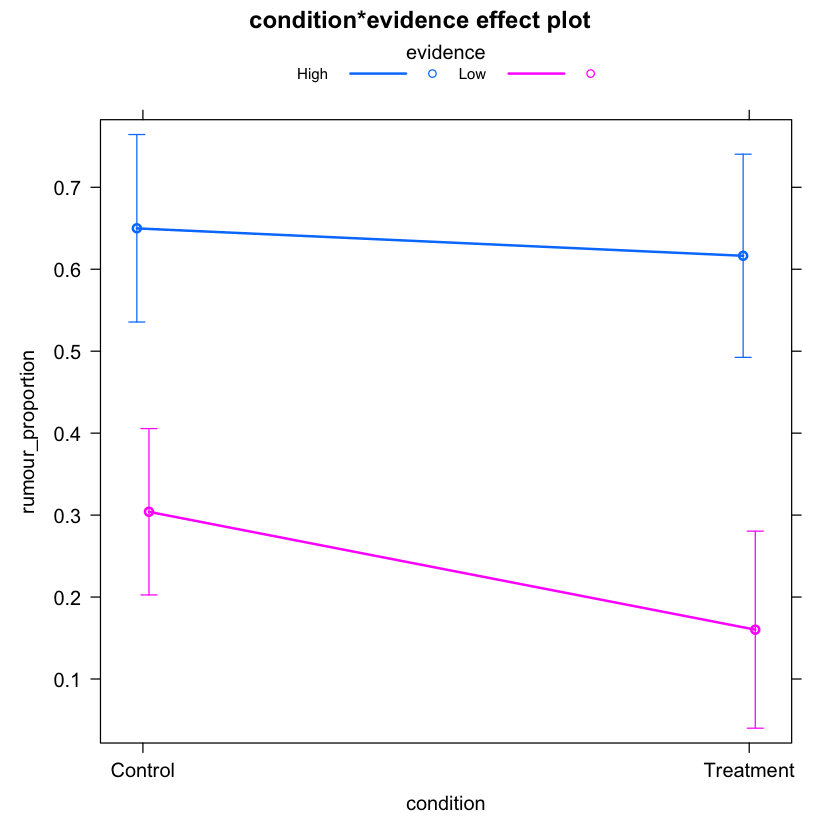

In [14]:
library(effects)
plot(allEffects(md.rumour_prop), multiline=TRUE, ci.style="bars")